<a href="https://colab.research.google.com/github/JoaoVlopess/python-Algorithms-Projects/blob/main/Trabalho_Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rota 1: CD para Meireles
Caminho: Maracanaú (CD) -> Pici -> Cocó -> Meireles
Custo Total: 3.6

Rota 2: CD para Messejana
Caminho: Maracanaú (CD) -> Messejana
Custo Total: 2.6

Gerando visualização do mapa...


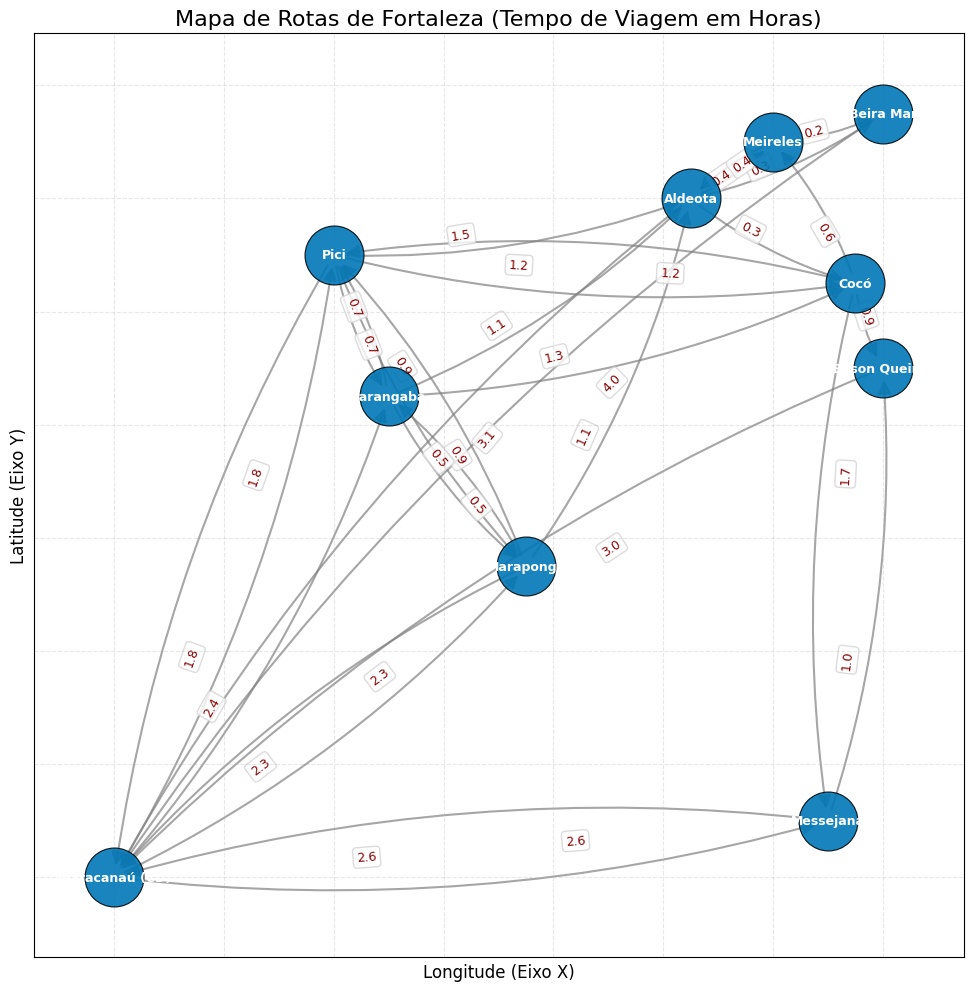

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

mapa_de_fortaleza_custos = {
    # Rotas partindo do Novo Centro de Distribuição (Maracanaú)
    'Maracanaú (CD)': {
        'Maraponga': 2.3,
        'Messejana': 2.6,
        'Parangaba': 2.4,
        'Pici': 1.8,
    },

    'Maraponga': {
        'Parangaba': 0.5, 'Maracanaú (CD)': 2.3, 'Aldeota': 1.1, 'Pici': 0.9
    },
    'Parangaba': {
        'Aldeota': 1.1, 'Maraponga': 0.5, 'Cocó': 1.3, 'Pici': 0.7
    },
    'Aldeota': {
        'Cocó': 0.3, 'Meireles': 0.4, 'Beira Mar': 0.3, 'Maracanaú (CD)': 3.1
    },
    'Cocó': {
        'Meireles': 0.6, 'Messejana': 1.7, 'Edson Queiroz': 0.9, 'Pici': 1.2
    },
    'Meireles': {
        'Aldeota': 0.4, 'Beira Mar': 0.2
    },
    'Messejana': {
        'Edson Queiroz': 1.0, 'Maracanaú (CD)': 2.6
    },

    'Pici': {
        'Parangaba': 0.7,
        'Maraponga': 0.9,
        'Cocó': 1.2,
        'Aldeota': 1.5,
        'Maracanaú (CD)': 1.8
    },


    'Beira Mar': {
        'Maracanaú (CD)': 4.0
    },
    'Edson Queiroz': {
        'Maracanaú (CD)': 3.0
    }
}
pos_realista_final = {
    'Maracanaú (CD)': (-38.62, -3.86),
    'Meireles': (-38.50, -3.73),
    'Aldeota': (-38.515, -3.74),
    'Cocó': (-38.485, -3.755),
    'Beira Mar': (-38.48, -3.725),
    'Edson Queiroz': (-38.48, -3.77),
    'Parangaba': (-38.57, -3.775),
    'Maraponga': (-38.545, -3.805),
    'Messejana': (-38.49, -3.85),
    'Pici': (-38.58, -3.75)
}


G = nx.DiGraph()
for origem, destinos in mapa_de_fortaleza_custos.items():
    for destino, peso in destinos.items():
        G.add_edge(origem, destino, weight=peso)

def dijsktra(grafo, origem, destino):
    N = {origem}
    distancias = {}
    infinito = float('inf')


    for v in grafo.nodes:
        if v == origem:
            distancias[v] = {'custo' : 0.0, 'caminho' : [origem]}

        elif grafo.has_edge(origem, v):
            distancias[v] = {
                'custo' : grafo[origem][v]['weight'],
                'caminho' : [origem, v]
                }
        else:
            distancias[v] = {'custo': infinito, 'caminho': []}


    while len(N) < grafo.number_of_nodes():
        menor_custo = infinito
        w = None

        for no in grafo.nodes:
            custo_no = distancias.get(no, {}).get('custo', infinito)

            if no not in N and custo_no < menor_custo:
                menor_custo = custo_no
                w = no

        # Condição de parada: não há mais nós alcançáveis
        if w is None or menor_custo == infinito:
            break

        N.add(w)

        # Relaxamento
        for v in grafo.neighbors(w):
            if v not in N:
                custo_aresta = grafo[w][v]['weight']
                custo_de_w = distancias[w]['custo']
                nova_distancia = custo_de_w + custo_aresta

                custo_de_v_atual = distancias[v]['custo']


                if nova_distancia < custo_de_v_atual:
                    novo_caminho = distancias[w]['caminho'] + [v]

                    distancias[v]['custo'] = nova_distancia
                    distancias[v]['caminho'] = novo_caminho


    resultado_destino = distancias[destino]

    if resultado_destino['custo'] == infinito:
        return "Destino inalcançável", infinito

    return resultado_destino['caminho'], resultado_destino['custo']

# Testes de Execução
origem_teste = 'Maracanaú (CD)'
destino_teste_1 = 'Meireles'
destino_teste_2 = 'Messejana'
destino_teste_3 = 'Maracanaú'

# Rota 1: CD para Meireles
rota_1, custo_1 = dijsktra(G, origem_teste, destino_teste_1)
print("Rota 1: CD para Meireles")
print(f"Caminho: {' -> '.join(rota_1)}")
print(f"Custo Total: {custo_1:.1f}")


# Rota 2: CD para Messejana
rota_2, custo_2 = dijsktra(G, origem_teste, destino_teste_2)
print("\nRota 2: CD para Messejana")
print(f"Caminho: {' -> '.join(rota_2)}")
print(f"Custo Total: {custo_2:.1f}")

print("\nGerando visualização do mapa...")

plt.figure(figsize=(12, 12))
plt.title("Mapa de Rotas de Fortaleza (Tempo de Viagem em Horas)", fontsize=16)

# Extrai os rótulos de peso (horas) para as arestas
edge_labels = nx.get_edge_attributes(G, 'weight')

# Desenhar Nós (Vertices)
nx.draw_networkx_nodes(
    G, pos_realista_final,
    node_size=1800,
    node_color='#0077b6',
    alpha=0.9,
    edgecolors='black',
    linewidths=0.8
)

nx.draw_networkx_edges(
    G, pos_realista_final,
    edge_color='gray',
    arrows=True,
    arrowsize=20,
    width=1.5,
    alpha=0.7,
    connectionstyle="arc3,rad=0.1"
)

nx.draw_networkx_labels(
    G, pos_realista_final,
    font_size=9,
    font_color='white',
    font_weight='bold'
)

nx.draw_networkx_edge_labels(
    G, pos_realista_final,
    edge_labels=edge_labels,
    label_pos=0.35,
    font_color='darkred',
    font_size=9,
    bbox={"boxstyle": "round,pad=0.3", "fc": "white", "ec": "lightgray", "alpha": 0.8}
)

plt.xlabel("Longitude (Eixo X)", fontsize=12)
plt.ylabel("Latitude (Eixo Y)", fontsize=12)
plt.axis('on')
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()
